# Actividad - Ecuaciones diferenciales

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp

In [14]:
solve_ivp?

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [28]:
def f(t,x,r): #orden solve_ivp?
    return x/(t+1)
tspan= [0,10]
x0=np.array([1])
r=0.5

x=solve_ivp(f,tspan,x0,args=(r,),max_step=0.1) #el paso mas grande que puede dar
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.000e+01  1.000e+01]
        y: [[ 1.000e+00  1.100e+00 ...  1.100e+01  1.100e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 608
     njev: 0
      nlu: 0

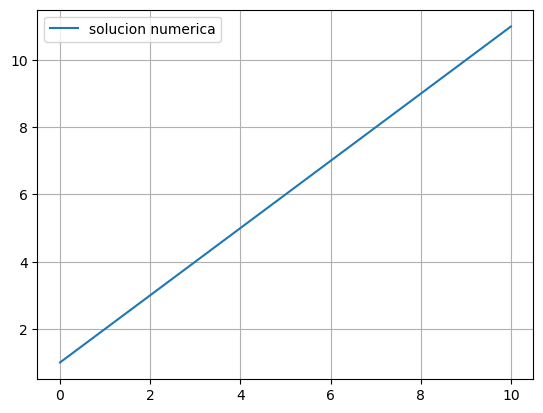

In [29]:
plt.figure()
plt.plot(x.t,x.y[0,:],label='solucion numerica')
plt.legend(loc='best')
plt.grid()

Grafique con condición inicial $x_0 = 2$

In [30]:
tspan= [0,20]
x0=np.array([2])
r=0.1

x=solve_ivp(f,tspan,x0,args=(r,),max_step=0.1) #el paso mas grande que puede dar
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.990e+01  2.000e+01]
        y: [[ 2.000e+00  2.200e+00 ...  4.180e+01  4.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1202
     njev: 0
      nlu: 0

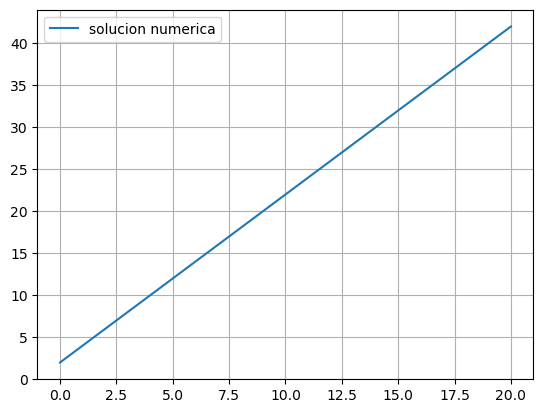

In [31]:
plt.figure()
plt.plot(x.t,x.y[0,:],label='solucion numerica')
plt.legend(loc='best')
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [40]:
def a(t, X):
    x=X[0]
    dx=X[1]
    dx2=-w0**2*x
    return [dx, dx2]

Grafique

In [35]:
tspan= [0,10]
w0=3
x0=np.array([0.5,0.1])
x=solve_ivp(a,tspan,x0,max_step=0.1) #el paso mas grande que puede dar
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.155e-02 ...  9.932e+00  1.000e+01]
        y: [[ 5.000e-01  5.009e-01 ... -5.851e-02  4.420e-02]
            [ 1.000e-01 -4.222e-02 ...  1.493e+00  1.497e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 608
     njev: 0
      nlu: 0

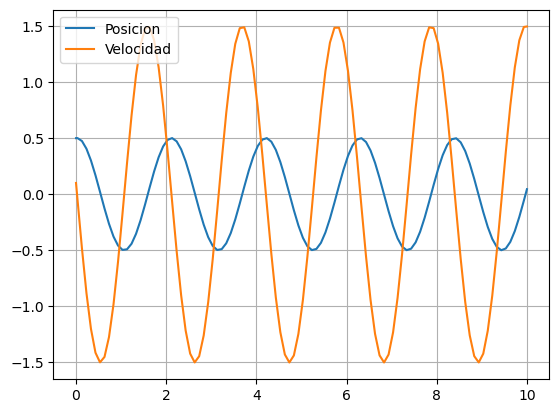

In [37]:
plt.figure()
plt.plot(x.t,x.y[0,:],label='Posicion')
plt.plot(x.t,x.y[1,:],label='Velocidad')
plt.legend(loc='best')
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [42]:
def posicion(t, w0, x_0, v0):
    A=x_0
    B=v0/w0
    return A*np.cos(w0*t)+B*np.sin(w0*t)
def velocidad(t, w0, x_0, v0):
    A=x_0
    B=v0/w0
    return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))


w0 = 3
x_0 = 0.5
v0 = 0.1

t = np.linspace(0, 10, 1000)
x = posicion(t, w0, x_0, v0)
v = velocidad(t, w0, x_0, v0)

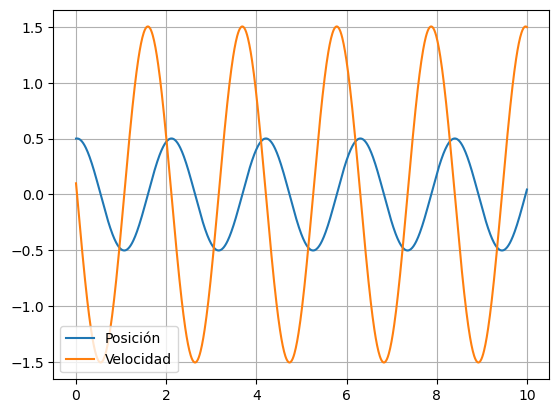

In [44]:
plt.figure()
plt.plot(t, x, label="Posición")
plt.plot(t, v, label="Velocidad")
plt.legend(loc='best')
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [50]:
def grafica(t, x_analytical, v_analytical, x_ivp):
    plt.figure()
    plt.plot(x_ivp.t, x_ivp.y[0, :], "k", label="Posición numérica", lw=5)
    plt.plot(x_ivp.t, x_ivp.y[1, :], "k", label="Velocidad numérica", lw=5)
    plt.plot(t, x_analytical, "y", label="Posición analítica")
    plt.plot(t, v_analytical, "y", label="Velocidad analítica")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [51]:
grafica(t, x_analytical, v_analytical, x_ivp)

NameError: name 'x_analytical' is not defined